<a href="https://colab.research.google.com/github/salmaaa9/HousingBytorchRegression/blob/main/HousingBytorchRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:

# Load the dataset
df = pd.read_csv('Housing-1.csv')
print(df.head());
# Check for missing values
print(df.isnull().sum())

# no missing values so no dropping

# Split dataset into features (X) and target (y)
X = df[['area']]  # Assuming 'Area' is a column
y = df['price']   # Assuming 'Price' is a column


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
price               0
area                0
bedrooms            0
bathrooms           0
stories    

Neural Network Architecture

In [23]:
import torch
import torch.nn as nn

# Define the ANN model
class SimpleANN(nn.Module):
    def __init__(self):
        super(SimpleANN, self).__init__()
        self.layer1 = nn.Linear(1, 64)  # Input size is 1 for 'Area'
        self.layer2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)  # Output size is 1 for 'Price'

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output(x)
        return x

# Initialize the model
model = SimpleANN()


In [24]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Convert the data to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Training loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 25205697150976.0000
Epoch [200/1000], Loss: 24891713650688.0000
Epoch [300/1000], Loss: 23895061037056.0000
Epoch [400/1000], Loss: 21937589846016.0000
Epoch [500/1000], Loss: 18980620206080.0000
Epoch [600/1000], Loss: 15292733325312.0000
Epoch [700/1000], Loss: 11419119517696.0000
Epoch [800/1000], Loss: 8002282717184.0000
Epoch [900/1000], Loss: 5487925395456.0000
Epoch [1000/1000], Loss: 3945811148800.0000


Model Evaluation

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
model.eval()  # Set model to evaluation mode
y_pred_test = model(X_test_tensor).detach().numpy()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f'MSE: {mse}, MAE: {mae}, R-squared: {r2}')


MSE: 5866482961692.438, MAE: 1780660.0848623854, R-squared: -0.1606292724609375


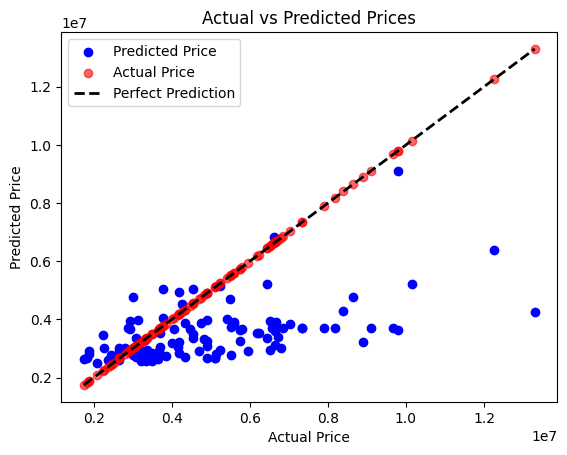

In [27]:
import matplotlib.pyplot as plt

# Plot actual prices (y_test) in red and predicted prices (y_pred_test) in blue
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted Price')
plt.scatter(y_test, y_test, color='red', label='Actual Price', alpha=0.6)  # Plot actual prices as red dots

# Add a line to show perfect prediction (diagonal line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')

# Add legend to differentiate between actual and predicted
plt.legend()

# Show the plot
plt.show()

